This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

**Training the same model on MNIST data with noise channels or all-zero channels**

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 4s 3ms/step - loss: 0.6243 - accuracy: 0.8100 - val_loss: 0.2890 - val_accuracy: 0.9133
Epoch 2/10
375/375 [==============================] - 1s 2ms/step - loss: 0.2530 - accuracy: 0.9211 - val_loss: 0.1784 - val_accuracy: 0.9495
Epoch 3/10
375/375 [==============================] - 1s 2ms/step - loss: 0.1634 - accuracy: 0.9501 - val_loss: 0.1376 - val_accuracy: 0.9597
Epoch 4/10
375/375 [==============================] - 1s 2ms/step - loss: 0.1161 - accuracy: 0.9638 - val_loss: 0.1610 - val_accuracy: 0.9543
Epoch 5/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0849 - accuracy: 0.9730 - val_loss: 0.1376 - val_accuracy: 0.9615
Epoch 6/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0632 - accuracy: 0.9798 - val_loss: 0.1387 - val_accuracy: 0.9602
Epoch 7/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0481 - accuracy: 0.9843 - val_loss: 0.1274 - val_accuracy: 0.9658
Epoch 

**Plotting a validation accuracy comparison**

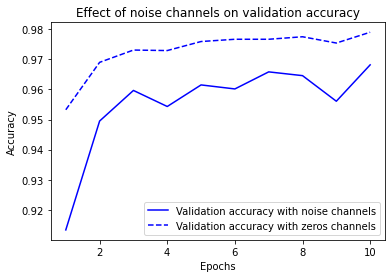

In [3]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [4]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 1s 3ms/step - loss: 2.3178 - accuracy: 0.1011 - val_loss: 2.3064 - val_accuracy: 0.1021
Epoch 2/100
375/375 [==============================] - 1s 2ms/step - loss: 2.2997 - accuracy: 0.1179 - val_loss: 2.3190 - val_accuracy: 0.1040
Epoch 3/100
375/375 [==============================] - 1s 2ms/step - loss: 2.2907 - accuracy: 0.1275 - val_loss: 2.3133 - val_accuracy: 0.1042
Epoch 4/100
375/375 [==============================] - 1s 2ms/step - loss: 2.2766 - accuracy: 0.1412 - val_loss: 2.3253 - val_accuracy: 0.1047
Epoch 5/100
375/375 [==============================] - 1s 2ms/step - loss: 2.2595 - accuracy: 0.1554 - val_loss: 2.3330 - val_accuracy: 0.1031
Epoch 6/100
375/375 [==============================] - 1s 2ms/step - loss: 2.2375 - accuracy: 0.1692 - val_loss: 2.3509 - val_accuracy: 0.1033
Epoch 7/100
375/375 [==============================] - 1s 2ms/step - loss: 2.2145 - accuracy: 0.1841 - val_loss: 2.3623 - val_accuracy: 0.1057

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [5]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 1s 3ms/step - loss: 1076.1730 - accuracy: 0.4099 - val_loss: 2.6454 - val_accuracy: 0.2562
Epoch 2/10
375/375 [==============================] - 1s 2ms/step - loss: 5.6130 - accuracy: 0.2596 - val_loss: 1.9882 - val_accuracy: 0.2726
Epoch 3/10
375/375 [==============================] - 1s 2ms/step - loss: 2.5301 - accuracy: 0.2756 - val_loss: 2.2484 - val_accuracy: 0.2970
Epoch 4/10
375/375 [==============================] - 1s 2ms/step - loss: 2.9354 - accuracy: 0.2689 - val_loss: 2.1950 - val_accuracy: 0.2412
Epoch 5/10
375/375 [==============================] - 1s 2ms/step - loss: 2.6500 - accuracy: 0.2639 - val_loss: 1.9887 - val_accuracy: 0.2702
Epoch 6/10
375/375 [==============================] - 1s 2ms/step - loss: 2.9021 - accuracy: 0.2797 - val_loss: 2.1238 - val_accuracy: 0.2812
Epoch 7/10
375/375 [==============================] - 1s 2ms/step - loss: 2.4670 - accuracy: 0.2974 - val_loss: 2.2273 - val_accuracy: 0.2828
Epo

**The same model with a more appropriate learning rate**

In [6]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 1s 3ms/step - loss: 0.3509 - accuracy: 0.9116 - val_loss: 0.1765 - val_accuracy: 0.9504
Epoch 2/10
375/375 [==============================] - 1s 2ms/step - loss: 0.1417 - accuracy: 0.9629 - val_loss: 0.2044 - val_accuracy: 0.9530
Epoch 3/10
375/375 [==============================] - 1s 2ms/step - loss: 0.1120 - accuracy: 0.9736 - val_loss: 0.1611 - val_accuracy: 0.9697
Epoch 4/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0976 - accuracy: 0.9789 - val_loss: 0.1960 - val_accuracy: 0.9643
Epoch 5/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0905 - accuracy: 0.9816 - val_loss: 0.2023 - val_accuracy: 0.9702
Epoch 6/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0748 - accuracy: 0.9848 - val_loss: 0.2348 - val_accuracy: 0.9706
Epoch 7/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0802 - accuracy: 0.9859 - val_loss: 0.2825 - val_accuracy: 0.9667
Epoch 

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [7]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 1s 2ms/step - loss: 0.6667 - accuracy: 0.8388 - val_loss: 0.3565 - val_accuracy: 0.9062
Epoch 2/20
375/375 [==============================] - 1s 2ms/step - loss: 0.3509 - accuracy: 0.9043 - val_loss: 0.3074 - val_accuracy: 0.9157
Epoch 3/20
375/375 [==============================] - 1s 2ms/step - loss: 0.3156 - accuracy: 0.9129 - val_loss: 0.2910 - val_accuracy: 0.9198
Epoch 4/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2993 - accuracy: 0.9164 - val_loss: 0.2804 - val_accuracy: 0.9221
Epoch 5/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2896 - accuracy: 0.9196 - val_loss: 0.2763 - val_accuracy: 0.9232
Epoch 6/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2830 - accuracy: 0.9211 - val_loss: 0.2732 - val_accuracy: 0.9247
Epoch 7/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2781 - accuracy: 0.9226 - val_loss: 0.2693 - val_accuracy: 0.9254
Epoch 

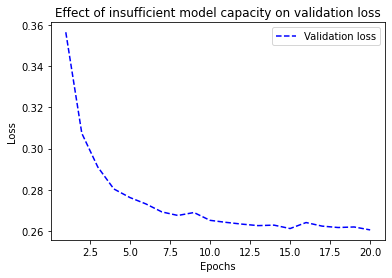

In [8]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [9]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 3ms/step - loss: 0.3684 - accuracy: 0.8954 - val_loss: 0.1928 - val_accuracy: 0.9445
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1661 - accuracy: 0.9499 - val_loss: 0.1483 - val_accuracy: 0.9571
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1201 - accuracy: 0.9631 - val_loss: 0.1235 - val_accuracy: 0.9636
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0918 - accuracy: 0.9725 - val_loss: 0.1049 - val_accuracy: 0.9691
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0731 - accuracy: 0.9780 - val_loss: 0.1105 - val_accuracy: 0.9669
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0589 - accuracy: 0.9822 - val_loss: 0.1035 - val_accuracy: 0.9705
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0483 - accuracy: 0.9856 - val_loss: 0.0950 - val_accuracy: 0.9732
Epoch 

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [10]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 31ms/step - loss: 0.5531 - accuracy: 0.7779 - val_loss: 0.4318 - val_accuracy: 0.8674
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.3534 - accuracy: 0.8953 - val_loss: 0.3336 - val_accuracy: 0.8832
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2560 - accuracy: 0.9185 - val_loss: 0.2953 - val_accuracy: 0.8871
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2014 - accuracy: 0.9361 - val_loss: 0.2890 - val_accuracy: 0.8831
Epoch 5/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1601 - accuracy: 0.9465 - val_loss: 0.2797 - val_accuracy: 0.8879
Epoch 6/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1323 - accuracy: 0.9579 - val_loss: 0.2868 - val_accuracy: 0.8880
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1069 - accuracy: 0.9695 - val_loss: 0.2984 - val_accuracy: 0.8876
Epoch 8/20
30

**Version of the model with lower capacity**

In [11]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 27ms/step - loss: 0.6145 - accuracy: 0.6305 - val_loss: 0.5455 - val_accuracy: 0.7407
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.5096 - accuracy: 0.8045 - val_loss: 0.5014 - val_accuracy: 0.8293
Epoch 3/20
30/30 [==============================] - 1s 17ms/step - loss: 0.4629 - accuracy: 0.8697 - val_loss: 0.4823 - val_accuracy: 0.8309
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.4304 - accuracy: 0.9017 - val_loss: 0.4869 - val_accuracy: 0.8158
Epoch 5/20
30/30 [==============================] - 0s 13ms/step - loss: 0.4064 - accuracy: 0.9197 - val_loss: 0.4600 - val_accuracy: 0.8620
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3861 - accuracy: 0.9349 - val_loss: 0.4559 - val_accuracy: 0.8673
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3684 - accuracy: 0.9467 - val_loss: 0.4681 - val_accuracy: 0.8544
Epoch 8/20
30

**Version of the model with higher capacity**

In [12]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 33ms/step - loss: 0.5463 - accuracy: 0.7666 - val_loss: 0.3772 - val_accuracy: 0.8440
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2564 - accuracy: 0.8989 - val_loss: 0.2655 - val_accuracy: 0.8944
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1545 - accuracy: 0.9405 - val_loss: 0.3117 - val_accuracy: 0.8808
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1051 - accuracy: 0.9683 - val_loss: 0.3648 - val_accuracy: 0.8860
Epoch 5/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1137 - accuracy: 0.9754 - val_loss: 0.3545 - val_accuracy: 0.8717
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0091 - accuracy: 0.9995 - val_loss: 0.4905 - val_accuracy: 0.8871
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0012 - accuracy: 0.9999 - val_loss: 0.6393 - val_accuracy: 0.8801
Epoch 8/20
30

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [13]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 1s 27ms/step - loss: 0.5841 - accuracy: 0.7906 - val_loss: 0.4656 - val_accuracy: 0.8609
Epoch 2/20
30/30 [==============================] - 0s 14ms/step - loss: 0.3909 - accuracy: 0.8963 - val_loss: 0.3844 - val_accuracy: 0.8833
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.3225 - accuracy: 0.9155 - val_loss: 0.3602 - val_accuracy: 0.8883
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2878 - accuracy: 0.9282 - val_loss: 0.3553 - val_accuracy: 0.8884
Epoch 5/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2681 - accuracy: 0.9342 - val_loss: 0.3564 - val_accuracy: 0.8848
Epoch 6/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2499 - accuracy: 0.9417 - val_loss: 0.3532 - val_accuracy: 0.8881
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2456 - accuracy: 0.9426 - val_loss: 0.3597 - val_accuracy: 0.8820
Epoch 8/20
30

**Different weight regularizers available in Keras**

In [14]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [15]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 1s 31ms/step - loss: 0.6360 - accuracy: 0.6267 - val_loss: 0.5209 - val_accuracy: 0.8382
Epoch 2/20
30/30 [==============================] - 0s 15ms/step - loss: 0.5268 - accuracy: 0.7544 - val_loss: 0.4320 - val_accuracy: 0.8632
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.4459 - accuracy: 0.8223 - val_loss: 0.3806 - val_accuracy: 0.8757
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.3876 - accuracy: 0.8611 - val_loss: 0.3408 - val_accuracy: 0.8778
Epoch 5/20
30/30 [==============================] - 0s 14ms/step - loss: 0.3418 - accuracy: 0.8867 - val_loss: 0.3082 - val_accuracy: 0.8843
Epoch 6/20
30/30 [==============================] - 0s 15ms/step - loss: 0.3055 - accuracy: 0.8998 - val_loss: 0.2873 - val_accuracy: 0.8916
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2664 - accuracy: 0.9180 - val_loss: 0.2800 - val_accuracy: 0.8902
Epoch 8/20
30

## Summary